# PCA and Autoencoders

Author: Ziyuan Li, 12211225

This assignment focuses on utilizing the PCA to reduce the dimensionality of data, and discussing the use of autoencoders.


# Data Preprocessing

We use the same data preprocessing code from before that reads from the wine dataset.



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


df = pd.read_csv('./data/wine.csv', header=None)
df.columns = ['Type', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',\
     'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols','Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']


# We do not discard the third class here
y = df.iloc[:,0]
X = df.iloc[:,1:]

df.head()


,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
# "Stratify" is used to ensure that the training and test sets have approximately the same percentage of samples of each target class as the complete set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Next we should standardize the data
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

print(X_train_std[:4])

[[ 0.98268636 -0.52764049  0.17359827 -1.08754344 -0.72766103  0.49145539
   0.79145985 -0.59671707  0.35458658  0.25541917  0.85746167  0.43782507
   1.86317967]
 [ 0.95793708 -0.74551086  1.25550363  0.83938558  0.06325176  1.13192275
   1.30655304 -0.59671707  1.3432327   0.29758662  1.03209459  0.15956344
   1.74910798]
 [ 0.40107814 -0.61289411  1.77780276 -1.23576875  0.65643635  0.49145539
   0.707363   -0.17049059 -0.42592352 -0.16625539  0.59551231  0.26208088
   0.42913559]
 [ 0.77231743 -0.59394886 -0.01293713 -0.16854652  0.39279876  0.90775917
   1.24348041 -1.19343414  0.59741194  0.80359609  0.59551231  0.40853438
   2.49872194]]


$C=\frac{1}{N}\sum_{n=1}^N(x^{(n)}-\bar{x})(x^{(n)}-\bar{x})^T=U\Sigma U^T\approx U_{1:M}\Sigma_{1:M}U_{1:M}^T$

We have already normalized the X matrix.
Next we will calculate the covariance matrix using the method given by numpy, and decompose it into eigenvalues and eigenvectors, which are the "principle components" of our data.


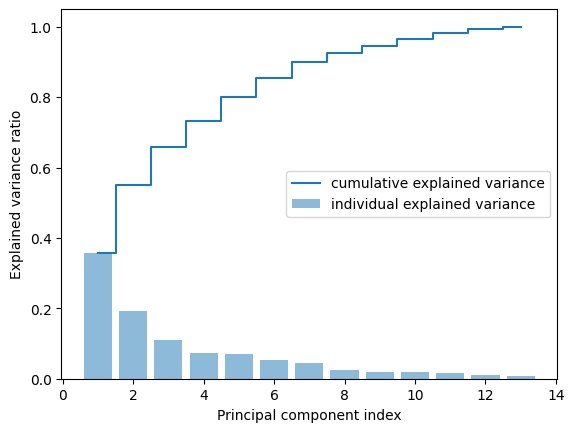

In [3]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)


tot = sum(eigen_vals) # Total sum of eigenvalues
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)] # Explained variance, accumulative. The highest explanations sit at front.
cum_var_exp = np.cumsum(var_exp) # uses numpy to calculate the cumulative sum of explained variances

plt.bar(range(1, 14), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

- Eigenvalues represent the amount of variance captured by each principal component. They indicate how much information (variance) is contained along each new axis after the transformation. 
A larger eigenvalue indicates that the corresponding principal component captures more variance, meaning it explains more of the variability in the dataset.
- Eigenvectors are the directions or axes in the transformed space. Each eigenvector corresponds to one principal component and points in the direction of maximum variance.


In [4]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))] # The eigenvectors are shaped in columns. There are 13 features, then there are 13 vectors.

eigen_pairs.sort(key=lambda k: k[0], reverse=True) # Sort the eigenvalues in descending order

for i in range(1,5):
    print(eigen_pairs[i])

w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis])) # Stack the two most informative eigenvectors into a 13x2 matrix, it is used to project the original high-dimensional data onto the 2D space spanned by the selected principal components.

print('Matrix W:\n', w)
X_train_pca = X_train_std.dot(w)


(2.517493700893585, array([-0.49414675, -0.1670862 , -0.33581955,  0.0230456 , -0.2816766 ,
       -0.07164769, -0.00569565, -0.04855187, -0.00589032, -0.52633004,
        0.28399523,  0.18136641, -0.3703045 ]))
(1.4425112439605554, array([-0.13550025,  0.08484512,  0.61436922,  0.62199483,  0.08744449,
        0.18025489,  0.1288233 ,  0.22290079,  0.16925303, -0.15886766,
        0.14029634,  0.13133987, -0.11347494]))
(0.9502568705615343, array([ 0.22002101, -0.34863385,  0.21029079, -0.11850515, -0.54616385,
        0.01134185,  0.01728643,  0.43279572, -0.38816555,  0.05280192,
        0.29582335,  0.05170014,  0.20518301]))
(0.9138815593826501, array([ 0.1001375 ,  0.51191077, -0.10967198, -0.01880619, -0.60714326,
        0.28882326,  0.23108185,  0.03104048,  0.17123031,  0.08025659,
       -0.32935599,  0.21901727, -0.13011228]))
Matrix W:
 [[ 0.15763477 -0.49414675]
 [-0.25237011 -0.1670862 ]
 [-0.01662626 -0.33581955]
 [-0.23514225  0.0230456 ]
 [ 0.14285062 -0.2816766 ]
 [ 

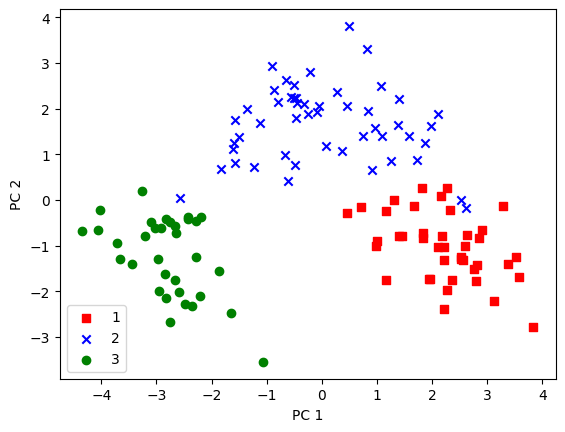

In [5]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()